# Keras

[Keras](https://keras.io) est une librairie Python très polulaire dédiée à l'apprentissage profond. Elle peut fonctionner comme surcouche de plusieurs librairies, comme [Tensorflow](https://www.tensorflow.org) ou [Theano](https://github.com/Theano/Theano). Keras est maintenant inclus dans [Tensorflow 2.0](https://www.tensorflow.org/api_docs/python/tf/keras)

Keras a été développée pour travailler avec des modèles à réseaux de neurones profonds, en faisant en sorte d'être simple à utiliser et intuitive. Keras inclut un certain nombre de couches, de fonctions d'activations et d'optimiseurs communément utilisés. Un modèle peut être défini et entrainé avec seulement quelques lignes de code en Python.

Keras fonctionne avec Matplotlib and NumPy.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json

from matplotlib import pyplot as plt

import numpy as np

# Apprentissage d'une fonction mathématique

Nous allons prendre un exemple simple : développer un modèle Keras pour prédire les valeurs en sortie d'une fonction mathématique. Cet exemple s'entraine rapidement, ce qui est idéal pour faire des expériences.

Les échantillons pour les tests et pour les données sont générés avec la fonction ci-dessous. Le nombre d'échantillons pour les tests peut être ajusté afin d'explorer la précision du modèle en fonction de la taille des données.

In [6]:
def function(x):
    return 10*x**2 - 5*x - 0.5

In [7]:
# Génération des données d'entrainement
x_entrainement = np.random.rand(10000)
y_entrainement = function(x_entrainement)

# Génération des données pour les tests
x_test = np.linspace(0, 1, 100)
y_test = function(x_test)

# Visualisation des données

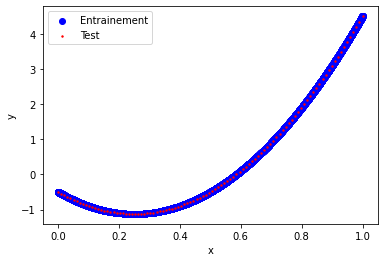

In [8]:
plt.scatter(x_entrainement, y_entrainement, label='Entrainement', color='blue')
plt.scatter(x_test, y_test, label='Test', color='red',s=2)
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Definition du modèle

Nous allons utiliser un [modèle séquentiel](https://keras.io/guides/sequential_model/) multi-couches avec une fonction d'activation de type [Unité Linéaire Rectifiée (Rectified Linear Unit - ReLU)](https://fr.wikipedia.org/wiki/Redresseur_(r%C3%A9seaux_neuronaux)). La couche de sortie n'a pas de fonction d'activation afin de produire des données continues en sortie.  
*  Le terme dense signifie qu'une fonction d'activation non linéaire est utlisée en sortie des couches internes.  
*  Le modèle séquentiel est adapté dans le cas où chaque couche possède une entrée et une sortie et où les couches s'échangent des données. Il n'est pas adapté pour les modèles multi-entrées / sorties ou dans le cas où il n'y a pas d'échange de données entre les couches.  


La structure du modèle est la suivante :  
*  L'entrée du modèle est de dimension 1. La couche d'entrée contient donc 1 neurone.  
*  La première couche cachée contient 200 neurones (units).    
*  La deuxième couche cachée contient 20 neurones.  
*  La couche de sortie contient un seul neurone.  
*  La couche d'entrée et la première couche cachée ont une fonction d'activation non linéaire de type ReLU en sortie.  

Sous forme graphique, sa structure est la suivante :  
  

![ReseauNeurone](KerasNeurone.png "ReseauNeurone")

In [9]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dense(units=1))

On peut obtenir une description du modèle créé avec la fonction **summary** :

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               400       
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                4020      
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 4,441
Trainable params: 4,441
Non-trainable params: 0
_________________________________________________________________


# Entrainement

[La documentation](https://keras.io/api/models/model_training_apis/) de l'API d'entrainement de Keras fournit des informations complémentaires sur la configuration.

In [11]:
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit(x_entrainement, y_entrainement, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))

2021-11-12 18:54:08.439836: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
200/200 [==============================] - 1s 1ms/step - loss: 1.3191 - val_loss: 0.1007
Epoch 2/10
200/200 [==============================] - 0s 913us/step - loss: 0.0308 - val_loss: 0.0114
Epoch 3/10
200/200 [==============================] - 0s 895us/step - loss: 0.0067 - val_loss: 0.0047
Epoch 4/10
200/200 [==============================] - 0s 894us/step - loss: 0.0032 - val_loss: 0.0025
Epoch 5/10
200/200 [==============================] - 0s 963us/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/10
200/200 [==============================] - 0s 906us/step - loss: 0.0011 - val_loss: 8.9639e-04
Epoch 7/10
200/200 [==============================] - 0s 901us/step - loss: 6.3415e-04 - val_loss: 5.7188e-04
Epoch 8/10
200/200 [==============================] - 0s 895us/step - loss: 3.8455e-04 - val_loss: 3.6172e-04
Epoch 9/10
200/200 [==============================] - 0s 945us/step - loss: 2.4254e-04 - val_loss: 2.3944e-04
Epoch 10/10
200/200 [==============================] - 0

# Les pertes du modèle (fonction d'objectif - Loss Function)

Les pertes sont la différence entre les valeurs attendues (y_entrainement) et les sorties du modèle. Plus les pertes sont faibles, plus le modèle est juste.

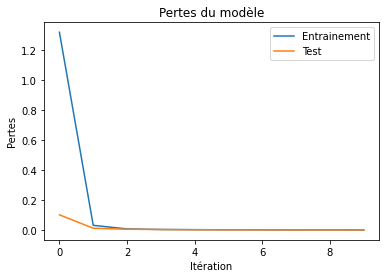

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pertes du modèle')
plt.ylabel('Pertes')
plt.xlabel('Itération')
plt.legend(['Entrainement', 'Test'], loc='upper right')
plt.show()

# Predictions

In [13]:
y_predictions = model.predict(x_test)

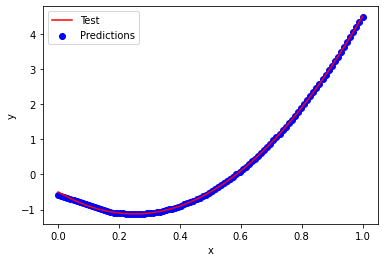

In [14]:
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Sauvegarde du modèle

La structure du modèle ainsi que les paramètres calculés (poids et offsets) peuvent être sauvegardés dans un fichier et rechargés plus tard.

In [15]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

# Chargement d'un modèle entrainé

In [16]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights.h5")

# Predictions

Utlisons le modèle sauvegardé pour faire des prédictions. On devriat retoruver les mêmes résultats.

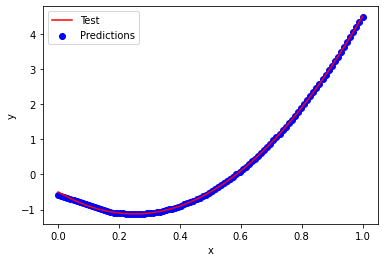

In [17]:
y_predictions = restored_model.predict(x_test)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()